In [57]:
import numpy as np
import matplotlib.pyplot as plt
from json import load as json_load
from math import hypot
import seaborn as sns
import pandas as pd
import matplotlib.style as style

In [71]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [78]:
style.use('seaborn-paper')

In [59]:
algorithm_results = []
random_results = []
num_experiments = 250
prefix_algorithms = 'AlgorithmExperiments/'
prefix_random = 'RandomExperiments/'

In [60]:
for i in range(1, num_experiments + 1):
    with open(f'{prefix_algorithms}Experiment{i}.json', 'rt') as fp:
        algorithm_results.append(json_load(fp))
        
for i in range(1, num_experiments + 1):
    with open(f'{prefix_random}Experiment{i}.json', 'rt') as fp:
        random_results.append(json_load(fp))

In [61]:
len(algorithm_results)

250

In [62]:
len(random_results)

250

In [63]:
def can_use_experiment(results):
    bfs_results = results['bfsResults']
    num_success_bfs = sum(bfs_results)
    
    if 0 < num_success_bfs < len(bfs_results):
        print (f'BFS: {num_success_bfs}')
        return False
    
    dfs_results = results['dfsResults']
    num_success_dfs = sum(dfs_results)
    
    if 0 < num_success_dfs < len(dfs_results):
        print (f'DFS: {num_success_dfs}')
        return False
    
    corner_results = results['tileResults']
    num_success_corners = sum(corner_results)
    
    if 0 < num_success_corners < len(corner_results):
        print (f'Corners: {num_success_corners}')
        return False
    
    if num_success_corners != num_success_bfs != num_success_dfs:
        print (num_success_dfs, num_success_dfs, num_success_corners)

    return True

In [64]:
algorithm_results = list(filter(can_use_experiment, algorithm_results))

len(algorithm_results)

Corners: 99
BFS: 74
Corners: 97
Corners: 52
BFS: 92
Corners: 66
Corners: 73
Corners: 42
Corners: 69
Corners: 94
Corners: 98
Corners: 79
Corners: 72
BFS: 94
BFS: 31
Corners: 97
Corners: 93
Corners: 75
BFS: 72
Corners: 72
Corners: 93
Corners: 99
Corners: 99
BFS: 93
Corners: 67
BFS: 97
Corners: 97
BFS: 80
Corners: 65
Corners: 31
Corners: 85


219

In [65]:
random_results = list(filter(can_use_experiment, random_results))

len(random_results)

Corners: 98
Corners: 98
BFS: 17
BFS: 93
BFS: 72
BFS: 86
Corners: 89
Corners: 98
Corners: 81
BFS: 99
Corners: 99


239

In [66]:
def get_scarcity(results):
    return 10*10 - (len(results['map'])/2)

def hider_seeker_separation(results):
    seeker_x = results['seekerX']
    seeker_y = results['seekerY']
    
    hider_x = results['hiderX']
    hider_y = results['hiderY']
    
    return hypot(seeker_x - hider_x, seeker_y - hider_y)

In [67]:
algorithm_scarcities = list(map(get_scarcity, algorithm_results))
algorithm_separations = list(map(hider_seeker_separation, algorithm_results))

In [101]:
np.mean(algorithm_scarcities), np.std(algorithm_scarcities)

(70.15525114155251, 6.005599161112892)

In [68]:
random_scarcities = list(map(get_scarcity, random_results))
random_separations = list(map(hider_seeker_separation, random_results))

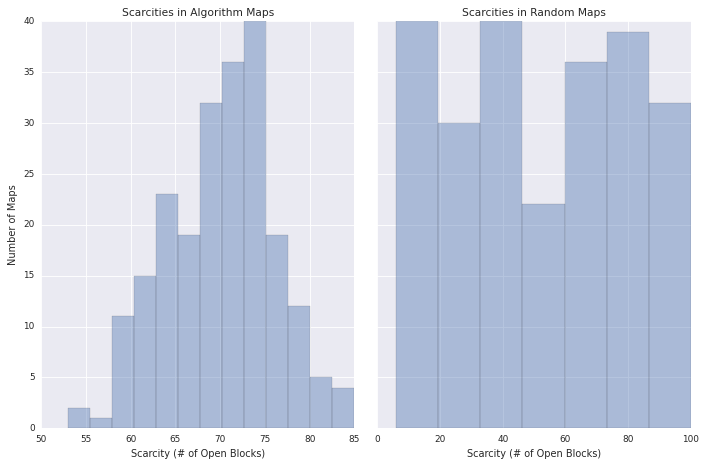

In [102]:
fig, axs = plt.subplots(1, 2, sharey=True)

sns.distplot(algorithm_scarcities, kde=False, ax=axs[0])
axs[0].set(title='Scarcities in Algorithm Maps')
axs[0].set(xlabel='Scarcity (# of Open Blocks)')
axs[0].set(ylabel='Number of Maps')

sns.distplot(random_scarcities, kde=False, ax=axs[1])
axs[1].set(title='Scarcities in Random Maps')
axs[1].set(xlabel='Scarcity (# of Open Blocks)')


plt.savefig('Report/Scarcity.png')

fig.set_size_inches(9, 6)
plt.tight_layout()

plt.show()

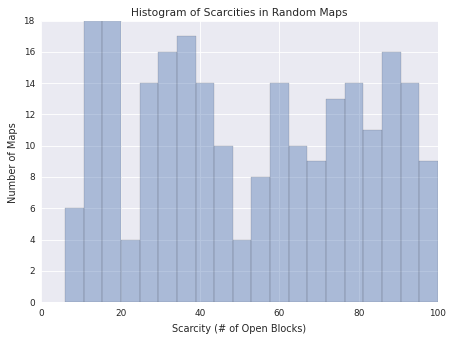

In [80]:
sns.distplot(random_scarcities, bins=20, kde=False)
plt.title('Histogram of Scarcities in Random Maps')
plt.xlabel('Scarcity (# of Open Blocks)')
plt.ylabel('Number of Maps')

plt.savefig('Report/ScarcityRandom.png')

plt.show()

In [14]:
def get_np_exams(results):
    bfs_mean = np.mean(results['bfsTimes'])
    bfs_std = np.std(results['bfsTimes'])
    
    dfs_mean = np.mean(results['dfsTimes'])
    dfs_std = np.std(results['dfsTimes'])
    
    corner_mean = np.mean(results['tileTimes'])
    corner_std = np.std(results['tileTimes'])
    
    return ((bfs_mean, bfs_std), (dfs_mean, dfs_std), (corner_mean, corner_std))

In [15]:
algorithm_np_examinations = list(map(get_np_exams, algorithm_results))
random_np_examinations = list(map(get_np_exams, random_results))

In [16]:
algorithm_np_examinations[0]

((251.99, 47.60682619120918),
 (148.09, 93.78828231714236),
 (2412.24, 1005.941669481884))

In [107]:
def greatest_np(item):
    bfs = item[0][0]
    dfs = item[1][0]
    corners = item[2][0]
    
    if bfs < dfs and bfs < corners:
        return 'BFS'
    elif dfs < bfs and dfs < corners:
        return 'DFS'
    else:
        return 'Corners'

In [110]:
greatest_algorithm = list(map(greatest_np, algorithm_np_examinations))
print (greatest_algorithm.count('BFS'))
print (greatest_algorithm.count('DFS'))
print (greatest_algorithm.count('Corners'))

greatest_random = list(map(greatest_np, random_np_examinations))
print (greatest_random.count('BFS'))
print (greatest_random.count('DFS'))
print (greatest_random.count('Corners'))

49
132
38
78
125
36


In [147]:
36/239

0.1506276150627615

In [29]:
def build_df(results):
    dfs_times = results['dfsTimes']
    bfs_times = results['bfsTimes']
    corner_times = results['tileTimes']
    
    labels = ['DFS']*len(dfs_times) + ['BFS']*len(bfs_times) + ['Corner']*len(corner_times)
    times = dfs_times + bfs_times + corner_times
    
    return pd.DataFrame(data={'Label':labels, 'Time':times})

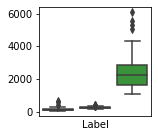

In [40]:
ax = sns.boxplot(x='Label', y='Time', data=build_df(algorithm_results[0]))

fig = plt.gcf()
fig.set_size_inches(2, 2)

ax.set(xticks=[])
ax.set(ylabel=None)

plt.show()

In [112]:
101 // 10

10

In [140]:
def boxplot(data, rnge, title='Random'):
    num_rows = (rnge[1] - rnge[0]) // 10
    fig, axs = plt.subplots(num_rows+1, 10, sharex='all')
    
    w = 10*3
    h = num_rows*3
    
    fig.set_size_inches(w, h)
    
    for r in range(rnge[0] // 10, rnge[1] // 10+1):
        for c in range(0, 10):
            idx = r*10 + c
            
            if idx >= len(data):
                break
            if idx < rnge[0] or idx > rnge[1]:
                continue
            curr_ax = axs[r-(rnge[0]//10), c]
            curr_ax.set(xlabel=None)
            curr_ax.set(ylabel=None)
            curr_ax.set(title=f'{title} {idx+1}')
            
            sns.boxplot(x='Label', y='Time', data=build_df(data[idx]), ax=curr_ax)
    
    shape_total = axs.shape[0]*axs.shape[1]
    len_curr = (rnge[1] - rnge[0] + 1)
    diff = shape_total - len_curr
    for c in range(9, 9-diff, -1):
        fig.delaxes(axs[num_rows,c])
    
    plt.tight_layout()
    plt.savefig(f'Report/{title}{rnge[0]}-{rnge[1]}.png')
    
    plt.show()

4


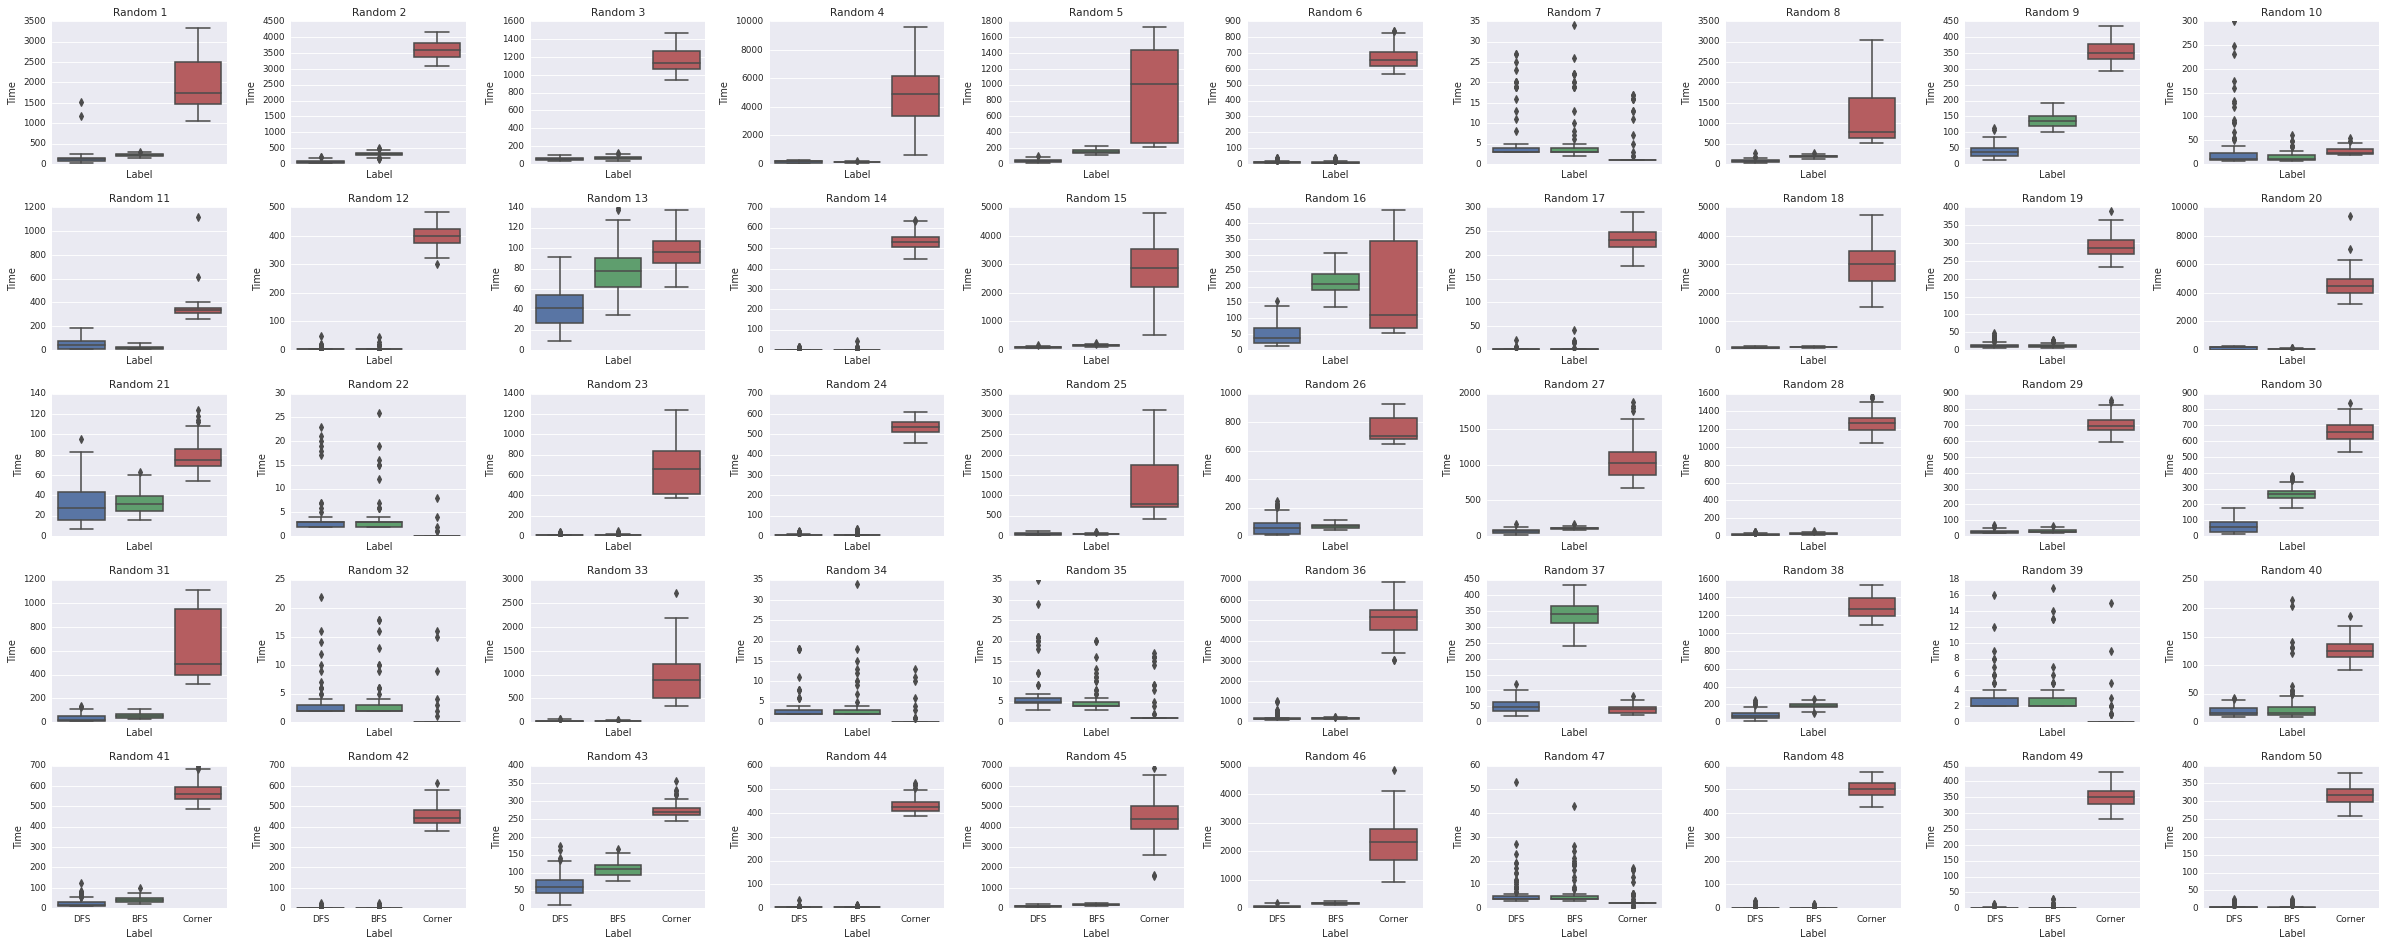

4


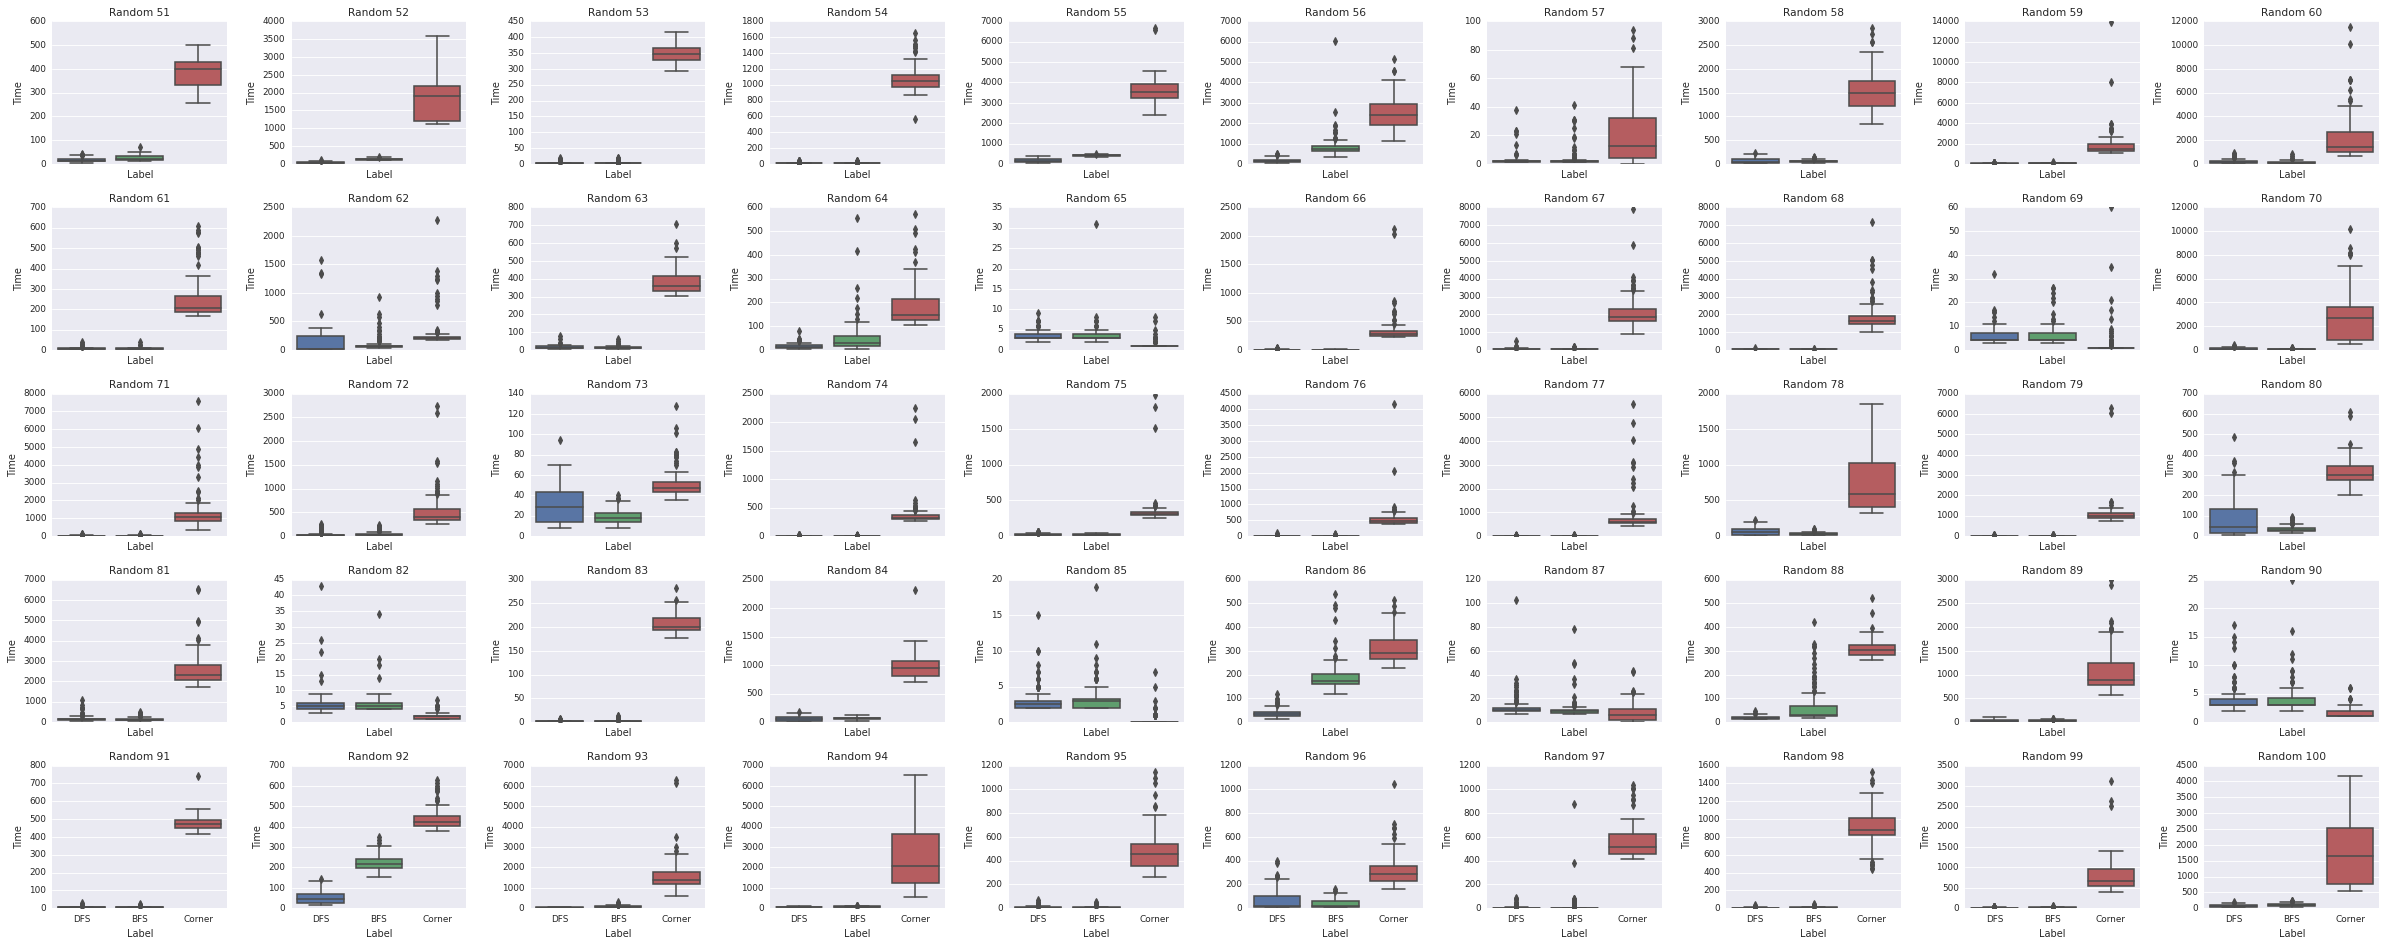

4


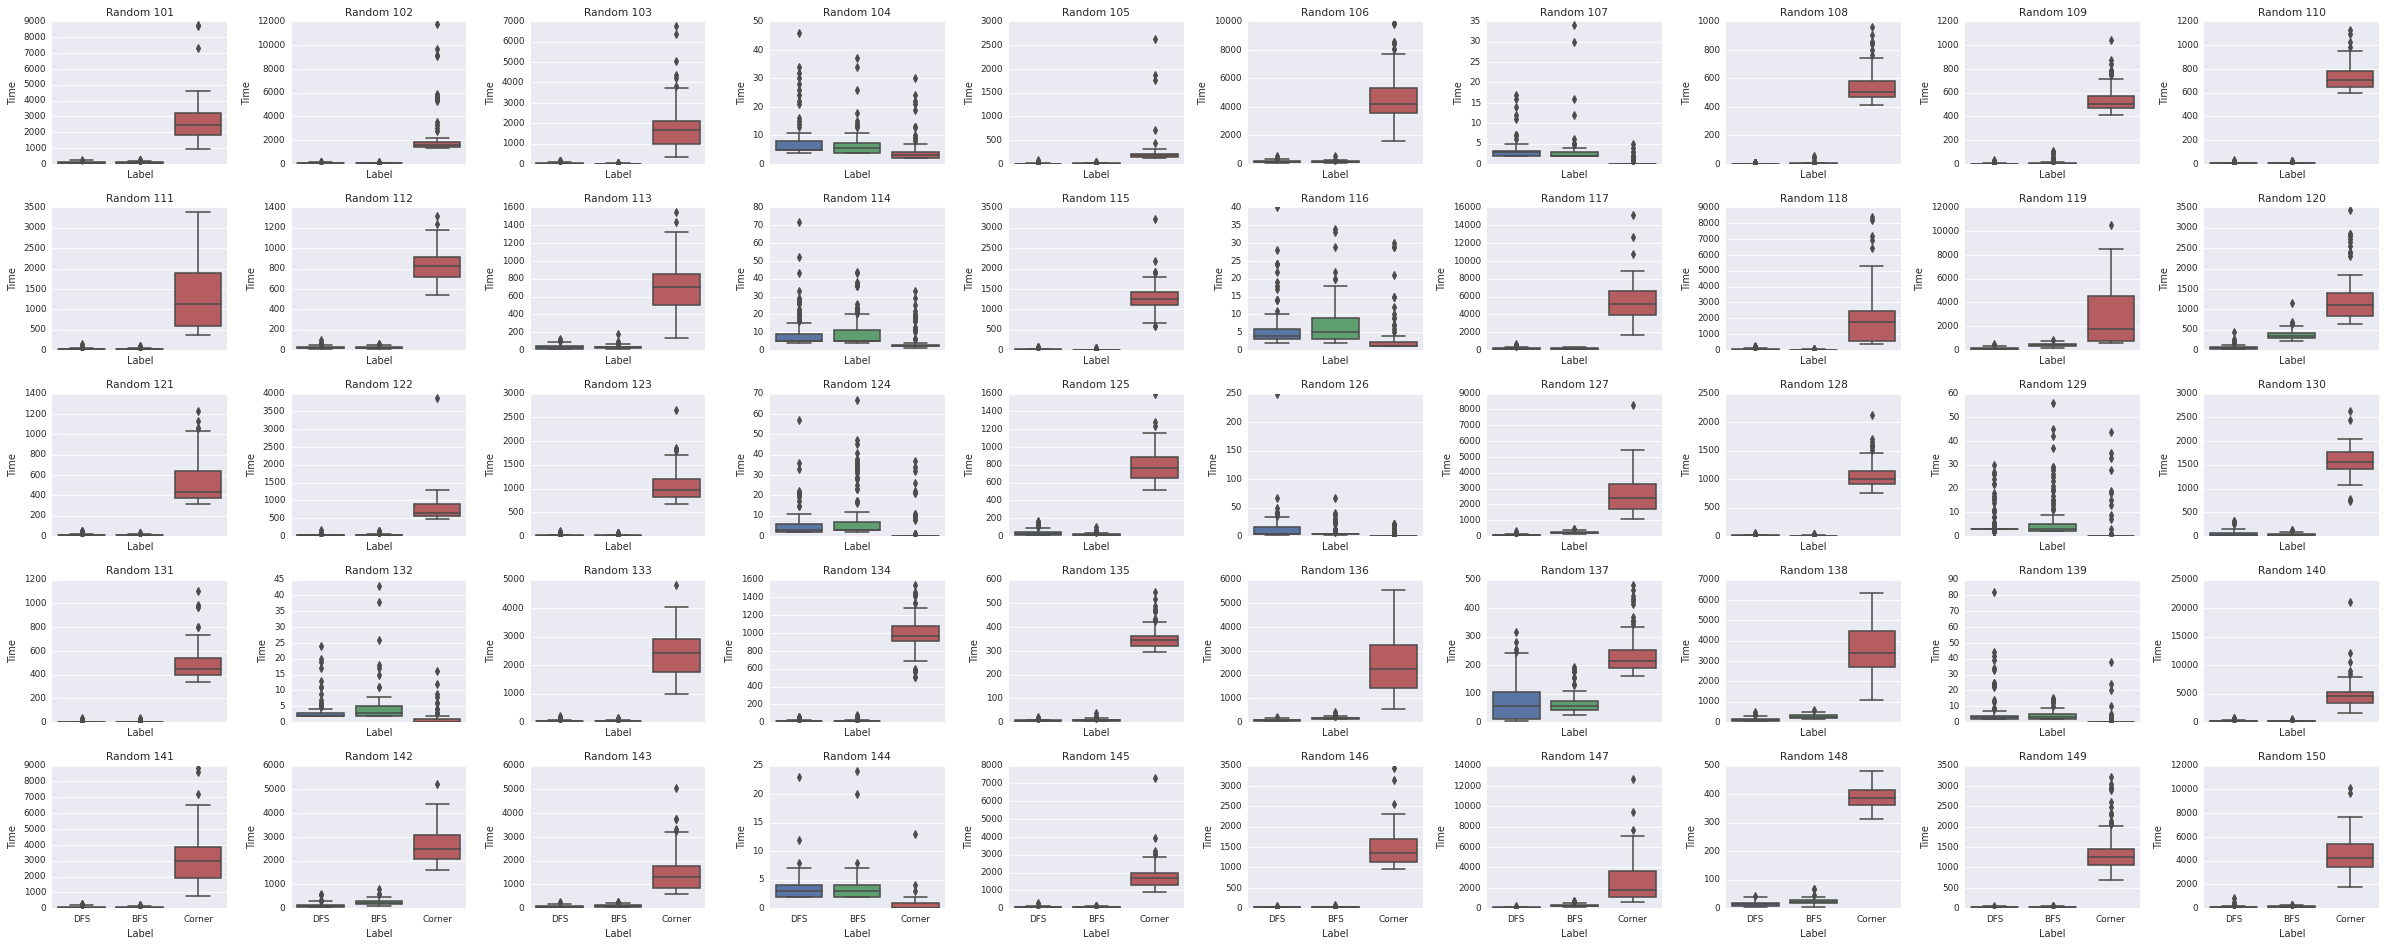

4


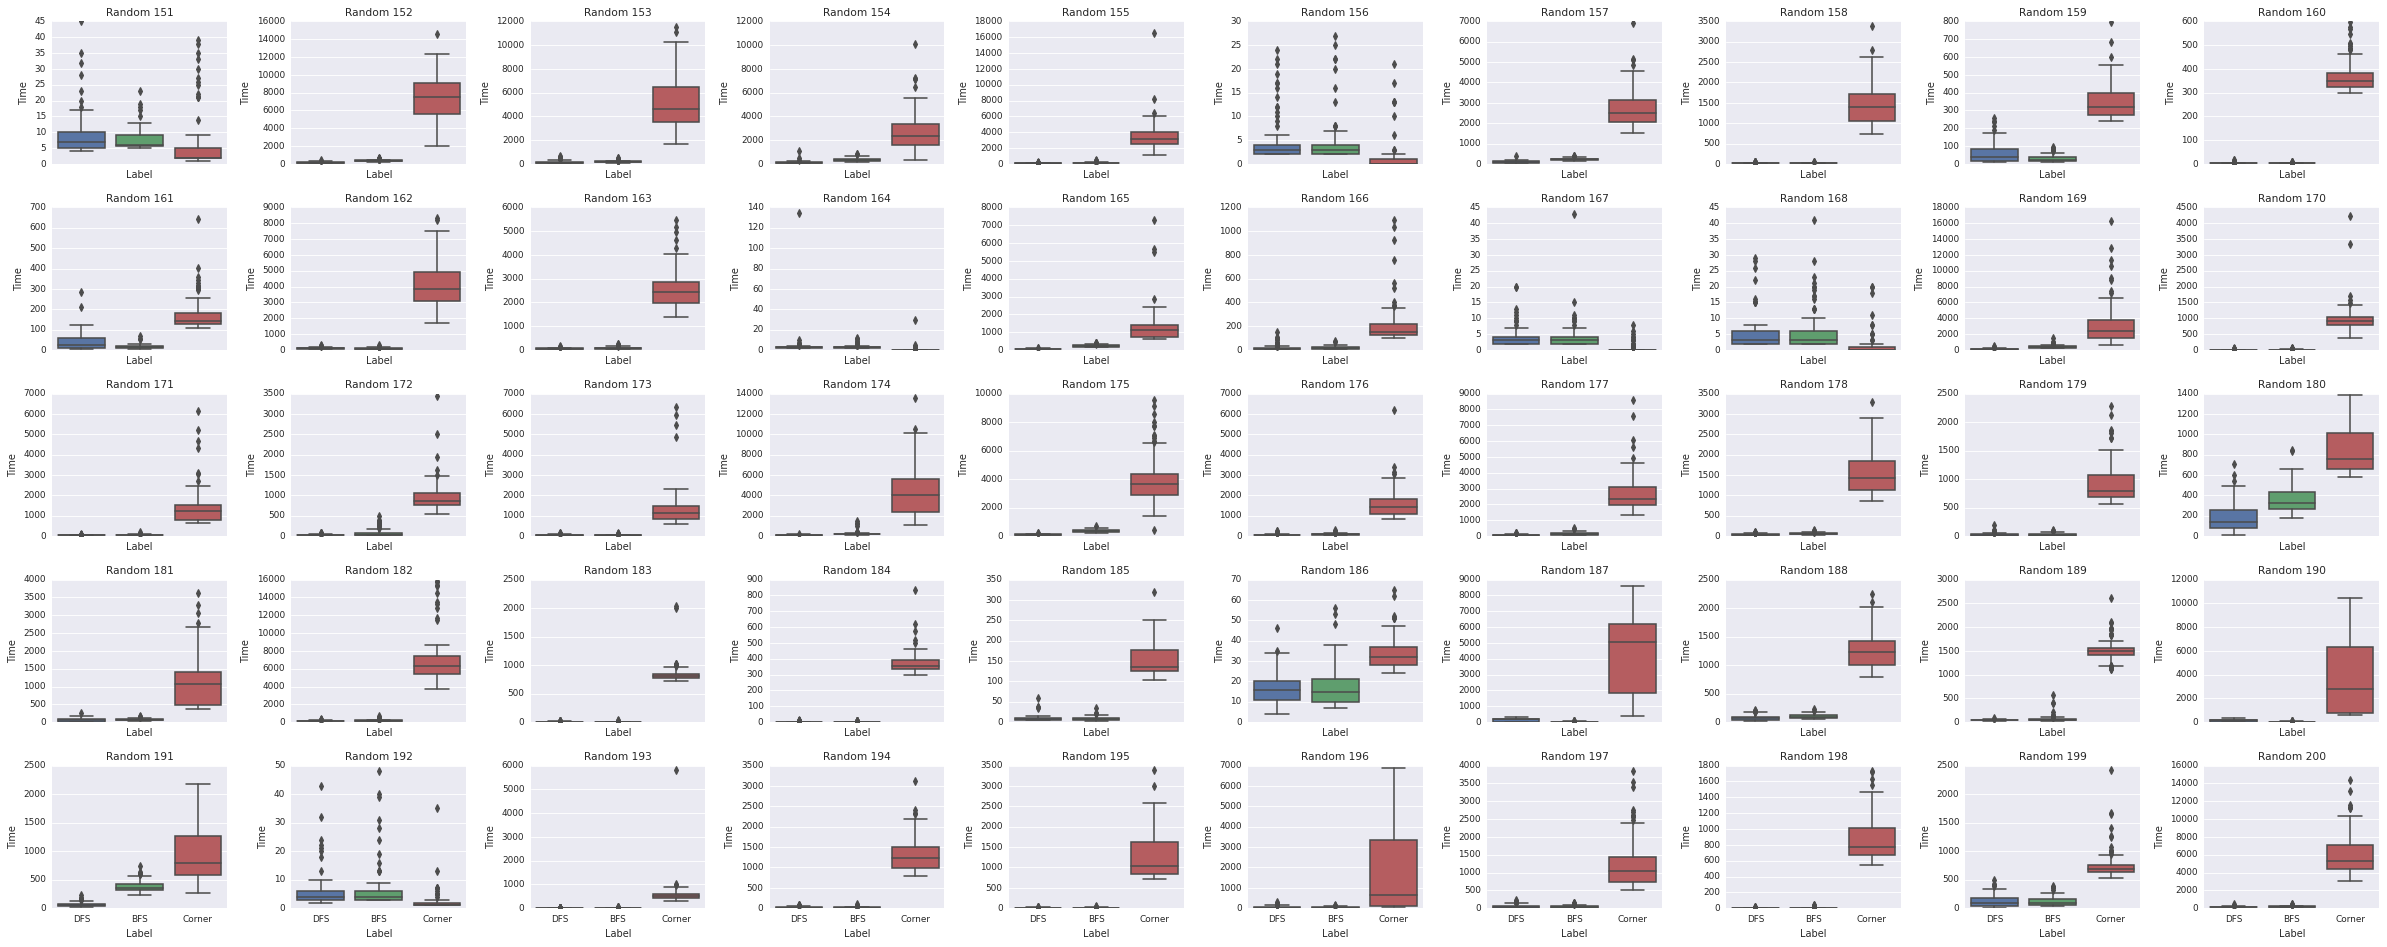

3


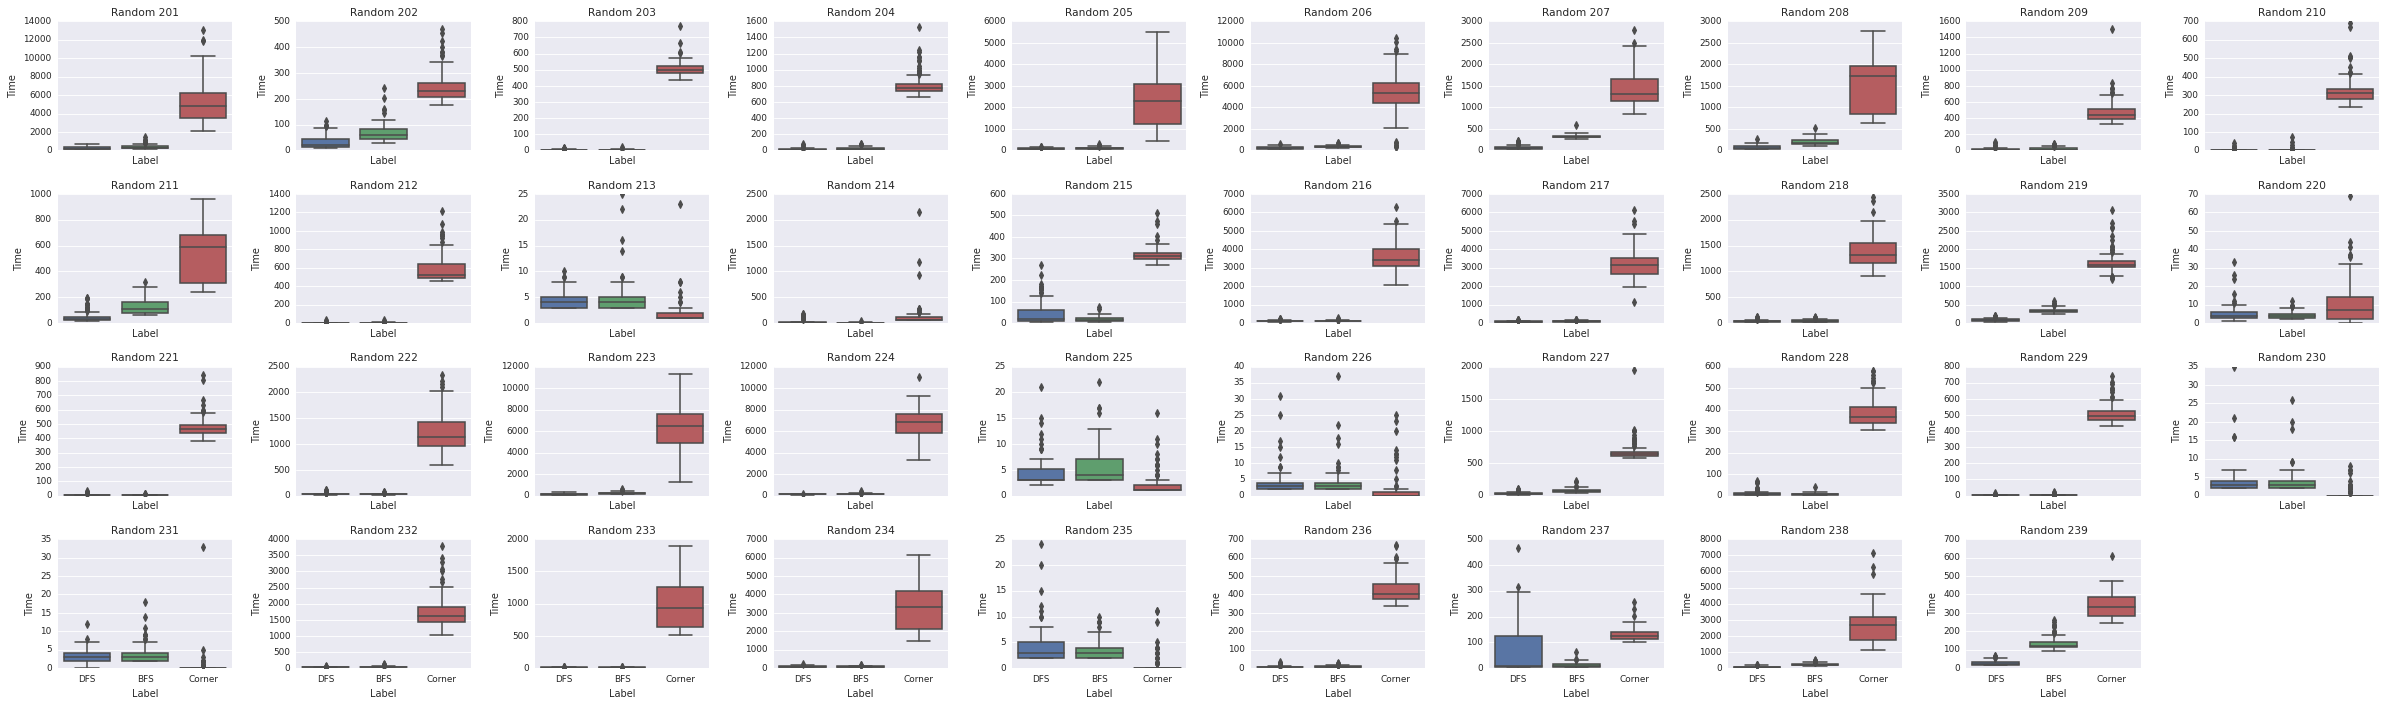

In [141]:
boxplot(random_results, (0, 49))
boxplot(random_results, (50, 99))
boxplot(random_results, (100, 149))
boxplot(random_results, (150, 199))
boxplot(random_results, (200, len(random_results)-1))

In [ ]:
boxplot(algorithm_results, (0, 49))
boxplot(algorithm_results, (50, 99))
boxplot(algorithm_results, (100, 149))
boxplot(algorithm_results, (150, 199))
boxplot(algorithm_results, (200, len(algorithm_results)-1))

In [150]:
def get_all_failed_and_success(data):
    bfs_failed = []
    dfs_failed = []
    tiles_failed = []
    bfs_success = []
    dfs_success = []
    tiles_success = []
    
    failed = list(filter(lambda item: sum(item['bfsResults']) == 0, data))
    success = list(filter(lambda item: sum(item['bfsResults']) == 100, data))
    print (len(failed))
    print (len(success))
    
    for item in failed:
        for time in item['bfsTimes']:
            bfs_failed.append(time)
        for time in item['dfsTimes']:
            dfs_failed.append(time)
        for time in item['tileTimes']:
            tiles_failed.append(time)
    for item in success:
        for time in item['bfsTimes']:
            bfs_success.append(time)
        for time in item['dfsTimes']:
            dfs_success.append(time)
        for time in item['tileTimes']:
            tiles_success.append(time)
    
    return ((bfs_failed, dfs_failed, tiles_failed), (bfs_success, dfs_success, tiles_success))

In [151]:
failed_and_success_algorithm = get_all_failed_and_success(algorithm_results)
failed_and_success_random = get_all_failed_and_success(random_results)

6
213
85
154


In [182]:
def get_mean_std(data, idx_one, idx_two):
    return np.mean(data[idx_one][idx_two]), np.std(data[idx_one][idx_two])

In [192]:
bfs_mean, bfs_std = get_mean_std(failed_and_success_random, 0, 0)
dfs_mean, dfs_std = get_mean_std(failed_and_success_random, 0, 1)
tile_mean, tile_std = get_mean_std(failed_and_success_random, 0, 2)

max_mean = max(bfs_mean, dfs_mean, tile_mean)
min_mean = min(bfs_mean, dfs_mean, tile_mean)

max_std = max(bfs_std, dfs_std, tile_std)
min_std = min(bfs_std, dfs_std, tile_std)

print ('BFS: {}, {} => {}, {}'.format(bfs_mean, bfs_std, (bfs_mean - min_mean)/(max_mean-min_mean), (bfs_std - min_std)/(max_std-min_std)))
print ('DFS: {}, {} => {}, {}'.format(dfs_mean, dfs_std, (dfs_mean - min_mean)/(max_mean-min_mean), (dfs_std - min_std)/(max_std-min_std)))
print ('Tile: {}, {} => {}, {}'.format(tile_mean, tile_std, (tile_mean - min_mean)/(max_mean-min_mean), (tile_std - min_std)/(max_std-min_std)))

BFS: 36.77541176470588, 56.47768144409823 => 0.0017347501539475667, 0.0
DFS: 34.3815294117647, 57.671640191404144 => 0.0, 0.0007609117447874938
Tile: 1414.3395294117647, 1625.5936209534302 => 1.0, 1.0


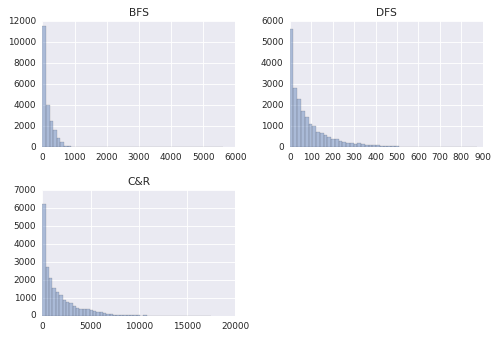

In [163]:
fig, axs = plt.subplots(2, 2)

sns.distplot(failed_and_success_algorithm[1][0], kde=False, ax=axs[0,0])
sns.distplot(failed_and_success_algorithm[1][1], kde=False, ax=axs[0,1])
sns.distplot(failed_and_success_algorithm[1][2], kde=False, ax=axs[1,0])

fig.delaxes(axs[1,1])

axs[0,0].set(title='BFS')
axs[0,1].set(title='DFS')
axs[1,0].set(title='C&R')

plt.tight_layout()

plt.savefig('Report/TimeHistAlg.png')

plt.show()

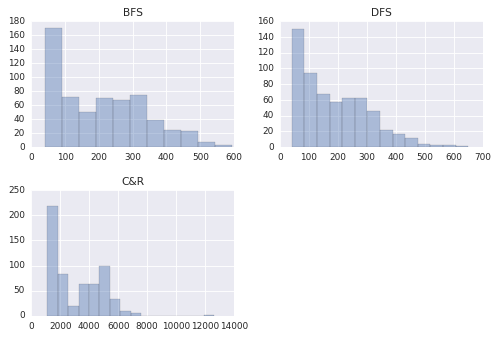

In [166]:
fig, axs = plt.subplots(2, 2)

sns.distplot(failed_and_success_algorithm[0][0], kde=False, ax=axs[0,0])
sns.distplot(failed_and_success_algorithm[0][1], kde=False, ax=axs[0,1])
sns.distplot(failed_and_success_algorithm[0][2], kde=False, ax=axs[1,0])

fig.delaxes(axs[1,1])

axs[0,0].set(title='BFS')
axs[0,1].set(title='DFS')
axs[1,0].set(title='C&R')

plt.tight_layout()

plt.savefig('Report/TimeHistAlgFailed.png')

plt.show()

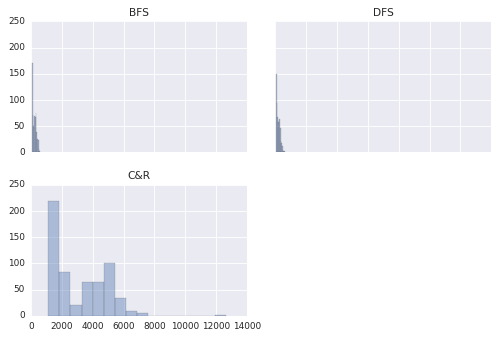

In [167]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)

sns.distplot(failed_and_success_algorithm[0][0], kde=False, ax=axs[0,0])
sns.distplot(failed_and_success_algorithm[0][1], kde=False, ax=axs[0,1])
sns.distplot(failed_and_success_algorithm[0][2], kde=False, ax=axs[1,0])

fig.delaxes(axs[1,1])

axs[0,0].set(title='BFS')
axs[0,1].set(title='DFS')
axs[1,0].set(title='C&R')

plt.tight_layout()

plt.savefig('Report/TimeHistAlgFailedShare.png')

plt.show()

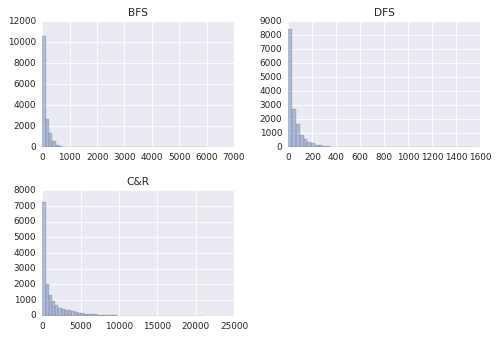

In [170]:
fig, axs = plt.subplots(2, 2)

sns.distplot(failed_and_success_random[1][0], kde=False, ax=axs[0,0])
sns.distplot(failed_and_success_random[1][1], kde=False, ax=axs[0,1])
sns.distplot(failed_and_success_random[1][2], kde=False, ax=axs[1,0])

fig.delaxes(axs[1,1])

axs[0,0].set(title='BFS')
axs[0,1].set(title='DFS')
axs[1,0].set(title='C&R')

plt.tight_layout()

plt.savefig('Report/TimeHistRandom.png')

plt.show()

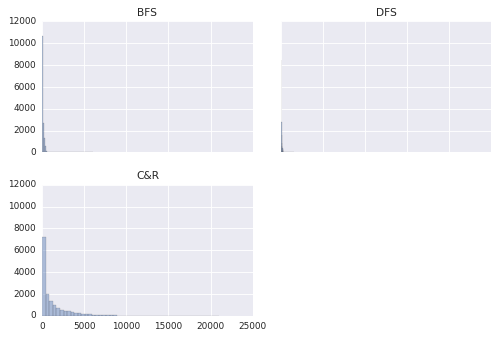

In [171]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')

sns.distplot(failed_and_success_random[1][0], kde=False, ax=axs[0,0])
sns.distplot(failed_and_success_random[1][1], kde=False, ax=axs[0,1])
sns.distplot(failed_and_success_random[1][2], kde=False, ax=axs[1,0])

fig.delaxes(axs[1,1])

axs[0,0].set(title='BFS')
axs[0,1].set(title='DFS')
axs[1,0].set(title='C&R')

plt.tight_layout()

plt.savefig('Report/TimeHistRandomShare.png')

plt.show()

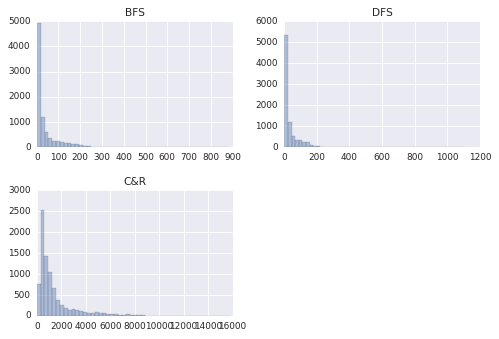

In [172]:
fig, axs = plt.subplots(2, 2)

sns.distplot(failed_and_success_random[0][0], kde=False, ax=axs[0,0])
sns.distplot(failed_and_success_random[0][1], kde=False, ax=axs[0,1])
sns.distplot(failed_and_success_random[0][2], kde=False, ax=axs[1,0])

fig.delaxes(axs[1,1])

axs[0,0].set(title='BFS')
axs[0,1].set(title='DFS')
axs[1,0].set(title='C&R')

plt.tight_layout()

plt.savefig('Report/TimeHistRandomFailed.png')

plt.show()

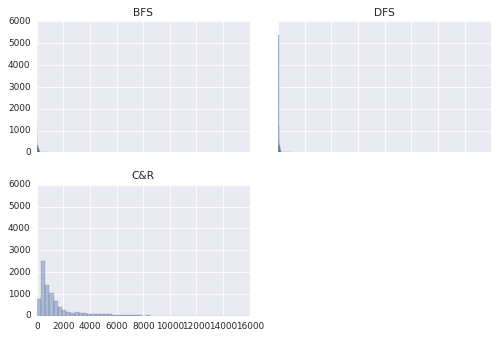

In [173]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')

sns.distplot(failed_and_success_random[0][0], kde=False, ax=axs[0,0])
sns.distplot(failed_and_success_random[0][1], kde=False, ax=axs[0,1])
sns.distplot(failed_and_success_random[0][2], kde=False, ax=axs[1,0])

fig.delaxes(axs[1,1])

axs[0,0].set(title='BFS')
axs[0,1].set(title='DFS')
axs[1,0].set(title='C&R')

plt.tight_layout()

plt.savefig('Report/TimeHistRandomFailedShare.png')

plt.show()

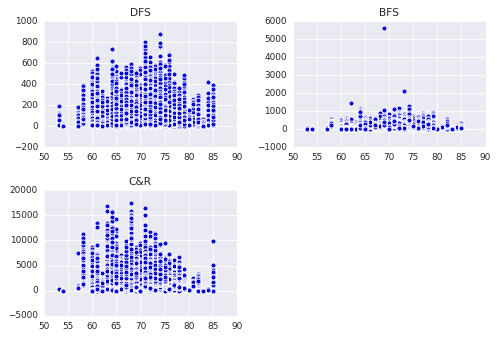

In [207]:
fig, axs = plt.subplots(2, 2)

dfs_times = [item['dfsTimes'] for item in algorithm_results]
dfs_overall = list()
scarcities_dfs = list()
for idx, item in enumerate(dfs_times):
    for time in item:
        dfs_overall.append(time)
        scarcities_dfs.append(algorithm_scarcities[idx])
        
bfs_times = [item['bfsTimes'] for item in algorithm_results]
bfs_overall = list()
scarcities_bfs = list()
for idx, item in enumerate(bfs_times):
    for time in item:
        bfs_overall.append(time)
        scarcities_bfs.append(algorithm_scarcities[idx])

tile_times = [item['tileTimes'] for item in algorithm_results]
tile_overall = list()
scarcities_tile = list()
for idx, item in enumerate(tile_times):
    for time in item:
        tile_overall.append(time)
        scarcities_tile.append(algorithm_scarcities[idx])
        
sns.scatterplot(x=scarcities_dfs, y=dfs_overall, ax=axs[0,0])
sns.scatterplot(x=scarcities_bfs, y=bfs_overall, ax=axs[0,1])
sns.scatterplot(x=scarcities_tile, y=tile_overall, ax=axs[1,0])

axs[0,0].set(title='DFS')
axs[0,1].set(title='BFS')
axs[1,0].set(title='C&R')

fig.delaxes(axs[1,1])

plt.tight_layout()

plt.savefig('Report/ScarcityTimeAlg.png')

plt.show()

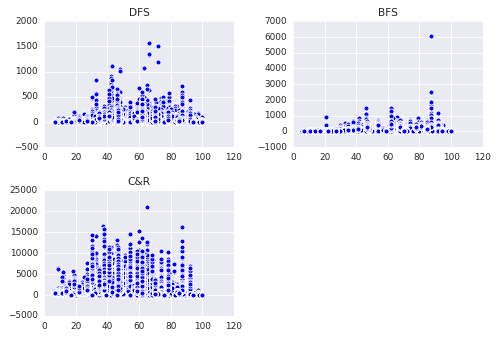

In [208]:
fig, axs = plt.subplots(2, 2)

dfs_times = [item['dfsTimes'] for item in random_results]
dfs_overall = list()
scarcities_dfs = list()
for idx, item in enumerate(dfs_times):
    for time in item:
        dfs_overall.append(time)
        scarcities_dfs.append(random_scarcities[idx])
        
bfs_times = [item['bfsTimes'] for item in random_results]
bfs_overall = list()
scarcities_bfs = list()
for idx, item in enumerate(bfs_times):
    for time in item:
        bfs_overall.append(time)
        scarcities_bfs.append(random_scarcities[idx])

tile_times = [item['tileTimes'] for item in random_results]
tile_overall = list()
scarcities_tile = list()
for idx, item in enumerate(tile_times):
    for time in item:
        tile_overall.append(time)
        scarcities_tile.append(random_scarcities[idx])
        
sns.scatterplot(x=scarcities_dfs, y=dfs_overall, ax=axs[0,0])
sns.scatterplot(x=scarcities_bfs, y=bfs_overall, ax=axs[0,1])
sns.scatterplot(x=scarcities_tile, y=tile_overall, ax=axs[1,0])

axs[0,0].set(title='DFS')
axs[0,1].set(title='BFS')
axs[1,0].set(title='C&R')

fig.delaxes(axs[1,1])

plt.tight_layout()

plt.savefig('Report/ScarcityTimeRandom.png')

plt.show()

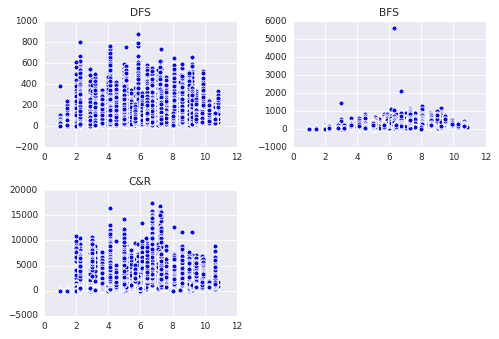

In [214]:
fig, axs = plt.subplots(2, 2)

dfs_times = [item['dfsTimes'] for item in algorithm_results]
dfs_overall = list()
sep_dfs = list()
for idx, item in enumerate(dfs_times):
    for time in item:
        dfs_overall.append(time)
        sep_dfs.append(algorithm_separations[idx])
        
bfs_times = [item['bfsTimes'] for item in algorithm_results]
bfs_overall = list()
sep_bfs = list()
for idx, item in enumerate(bfs_times):
    for time in item:
        bfs_overall.append(time)
        sep_bfs.append(algorithm_separations[idx])

tile_times = [item['tileTimes'] for item in algorithm_results]
tile_overall = list()
sep_tile = list()
for idx, item in enumerate(tile_times):
    for time in item:
        tile_overall.append(time)
        sep_tile.append(algorithm_separations[idx])
        
sns.scatterplot(x=sep_dfs, y=dfs_overall, ax=axs[0,0])
sns.scatterplot(x=sep_bfs, y=bfs_overall, ax=axs[0,1])
sns.scatterplot(x=sep_tile, y=tile_overall, ax=axs[1,0])

axs[0,0].set(title='DFS')
axs[0,1].set(title='BFS')
axs[1,0].set(title='C&R')

fig.delaxes(axs[1,1])

plt.tight_layout()

plt.savefig('Report/SepTimeAlg.png')
plt.show()

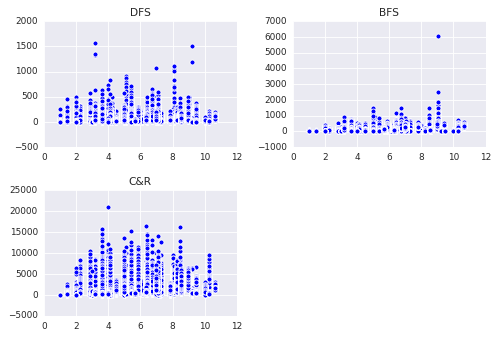

In [213]:
fig, axs = plt.subplots(2, 2)

dfs_times = [item['dfsTimes'] for item in random_results]
dfs_overall = list()
sep_dfs = list()
for idx, item in enumerate(dfs_times):
    for time in item:
        dfs_overall.append(time)
        sep_dfs.append(random_separations[idx])
        
bfs_times = [item['bfsTimes'] for item in random_results]
bfs_overall = list()
sep_bfs = list()
for idx, item in enumerate(bfs_times):
    for time in item:
        bfs_overall.append(time)
        sep_bfs.append(random_separations[idx])

tile_times = [item['tileTimes'] for item in random_results]
tile_overall = list()
sep_tile = list()
for idx, item in enumerate(tile_times):
    for time in item:
        tile_overall.append(time)
        sep_tile.append(random_separations[idx])
        
sns.scatterplot(x=sep_dfs, y=dfs_overall, ax=axs[0,0])
sns.scatterplot(x=sep_bfs, y=bfs_overall, ax=axs[0,1])
sns.scatterplot(x=sep_tile, y=tile_overall, ax=axs[1,0])

axs[0,0].set(title='DFS')
axs[0,1].set(title='BFS')
axs[1,0].set(title='C&R')

fig.delaxes(axs[1,1])

plt.tight_layout()

plt.savefig('Report/SepTimeRandom.png')
plt.show()

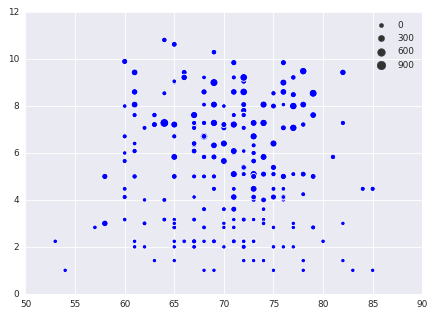

In [175]:
sns.scatterplot(x=algorithm_scarcities, y=algorithm_separations, size=[item[0][0] for item in algorithm_np_examinations])

plt.show()

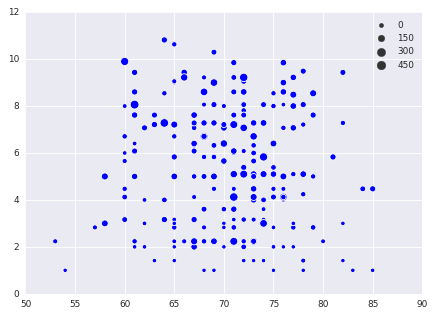

In [176]:
sns.scatterplot(x=algorithm_scarcities, y=algorithm_separations, size=[item[1][0] for item in algorithm_np_examinations])

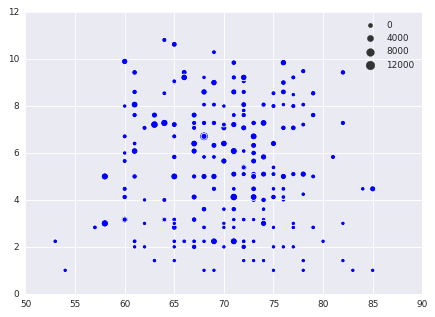

In [177]:
sns.scatterplot(x=algorithm_scarcities, y=algorithm_separations, size=[item[2][0] for item in algorithm_np_examinations])